Here, we use our complex paths to time integrate the viscous burgers equations and show the results in a final convergence plot.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

The complex paths

In [2]:
weights_lib = { 
                'Euler 1-step 1-order' : [1],
                'Euler 2-step 2-order' : [0.5 +0.5*1j, 0.5-0.5*1j],
                'Euler 2-step 3-order' : [1+1j*np.sqrt(2)/2,-1j*np.sqrt(2)/2],
                'Euler 2-step 3-order exp' : [0.838852+1j*0.604004, 0.161148-1j*0.604004],
                'Euler 2-step symplectic' : [0.5 +0.5*np.sqrt(3)*1j, 0.5-0.5*np.sqrt(3)*1j],
                'Euler 3-step 1-order' : [8.29344624e-01 , 5.95442650e-02, 1-8.29344624e-01-5.95442650e-02],
                'Euler 3-step 3-order' : [0.1867308533646 + 0.480773884550331*1j, 0.626538293270800, 0.1867308533646 - 0.480773884550331*1j],
                'Euler 3-step 2-order' : [0.411741936185254 + 0.430244574248458*1j, 0.176516127629493, 0.411741936185254-0.430244574248458*1j],
                'Midpo 2-step 4-order' :[0.5 + 0.28867513459*1j, 0.5-0.28867513459*1j]}

def pathwise(x, path):
    stepsize = x[1:]-x[:-1]
    contour = [x[0]]
    for i in range(len(x)-1):
        weights = np.cumsum(weights_lib[path])
        substeps = [x[i]+stepsize[i]*weight for weight in weights]
        contour +=substeps
    return np.array(contour)

Spatial differentiation is done by fourier differentiation.

In [3]:
def spec_diff(u, n = 1):
    #fourier differentiation
    N = len(u)
    k2 = np.zeros(N)
    if ((N%2)==0):
        #-even number                                                                                   
        for i in range(1,N//2):
            k2[i]=i
            k2[N-i]=-i
    else:
        #-odd number                                                                                    
        for i in range(1,(N-1)//2):
            k2[i]=i
            k2[N-i]=-i
    ik = (1j*k2)**n
    return np.fft.ifft(ik*np.fft.fft(u))

The first order path (forward Euler)

In [5]:
N = 100
x_dom = 2*np.pi*np.arange(0,N,1)/N
u_init = np.exp(-7*(x_dom-np.pi)**2)

T_final = 3
exact =  np.exp(-7*(x_dom-np.pi -T_final)**2)
timestep = 0.025
visc = 0.01
t = np.linspace(0, T_final, int(T_final/timestep+1))

scheme = 'Euler 1-step 1-order'
path1 = pathwise(t, scheme)
steps = path1[1:]-path1[:-1]

y1 = np.zeros((len(path1), len(u_init)), dtype = np.complex_)

y1[0] = u_init
i = 1
for step in steps:
    y1[i] = y1[i-1] - step*(0.5*spec_diff(y1[i-1]**2)-visc*spec_diff(y1[i-1],2))
    if i%int(scheme[6])==0:
        y1[i] = np.real(y1[i])
    i += 1

order_1 = y1

The second order path 

In [6]:
N = 100
x = 2*np.pi*np.arange(0,N,1)/N
#u_init = np.ones(N)*(np.abs(x-np.pi)<1)
u_init = np.exp(-7*(x-np.pi)**2)
#u_init = np.sin(x)

end = 3
exact =  np.exp(-7*(x-np.pi -end)**2)
#exact = np.ones(N)*(np.abs(x-np.pi-end)<1)
#exact = np.sin(x-end)
timestep = 0.05
visc = 0.01
t = np.linspace(0, end, int(end/timestep+1))
scheme = 'Euler 2-step 2-order'
path1 = pathwise(t, scheme)
steps = path1[1:]-path1[:-1]

y2 = np.zeros((len(path1), len(u_init)), dtype = np.complex_)

y2[0] = u_init
i = 1
for step in steps:
    #print(y[i-1])
    y2[i] = y2[i-1] - step*(0.5*spec_diff(y2[i-1]**2)-visc*spec_diff(y2[i-1],2))
    if i%int(scheme[6])==0:
        y2[i] = np.real(y2[i])
    i += 1

order_2 = y2

The 3rd path with a very small timestep. Used as the reference for error for the solutions from the other two paths

In [7]:
N = 100
x = 2*np.pi*np.arange(0,N,1)/N
#u_init = np.ones(N)*(np.abs(x-np.pi)<1)
u_init = np.exp(-7*(x-np.pi)**2)
#u_init = np.sin(x)

end = 3
exact =  np.exp(-7*(x-np.pi -end)**2)
#exact = np.ones(N)*(np.abs(x-np.pi-end)<1)
#exact = np.sin(x-end)
timestep = 0.00001
visc = 0.01
t = np.linspace(0, end,  int(end/timestep+1))
scheme = 'Euler 3-step 3-order'
path1 = pathwise(t, scheme)
steps = path1[1:]-path1[:-1]

y1 = np.zeros((len(path1), len(u_init)), dtype = np.complex_)

y1[0] = u_init
i = 1
for step in steps:
    #print(y[i-1])
    y1[i] = y1[i-1] - step*(0.5*spec_diff(y1[i-1]**2)-visc*spec_diff(y1[i-1],2))
    if i%int(scheme[6])==0:
        y1[i] = np.real(y1[i])
    i += 1

    
super_accurate = y1

Error

C:\Users\jithi\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1289: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Users\jithi\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1289: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


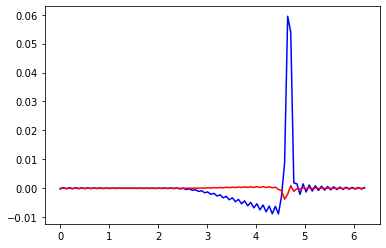

In [8]:
#plt.plot(x, y1[-1]-y2[-1], 'b' )
#plt.plot(x, y1[-1], 'b' )
plt.plot(x, order_1[-1]-super_accurate[-1], 'b' )
plt.plot(x, order_2[-1]-super_accurate[-1], 'r' )
#plt.plot(x, exact, 'r')

C:\Users\jithi\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1289: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Users\jithi\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1289: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Users\jithi\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1289: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Users\jithi\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1289: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


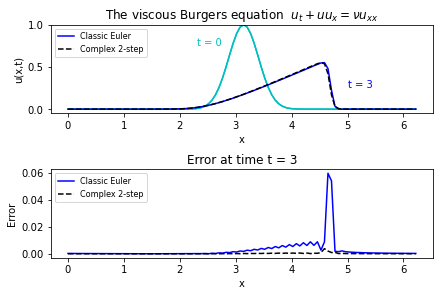

In [16]:
mosaic = """
    B
    C
    """
ax_dict = plt.figure(constrained_layout=True).subplot_mosaic(mosaic)
str1= 'B'
ax_dict[str1].plot(x, order_1[0], 'c')
ax_dict[str1].plot(x, order_2[0], 'c')
ax_dict[str1].text(2.3,0.75,'t = 0', c ='c')
ax_dict[str1].text(5,0.25,'t = 3', c ='b')
#ax_dict[str1].set_xlabel('x')
#ax_dict[str1].set_ylabel('Solution')
#ax_dict[str1].set_title('Solution at time t = 0')
#ax_dict[str1].legend( fontsize = 6)
str1= 'B'
ax_dict[str1].plot(x, order_1[-1], 'b', label = 'Classic Euler')
ax_dict[str1].plot(x, order_2[-1], 'k--', label = 'Complex 2-step')
ax_dict[str1].set_xlabel('x')
ax_dict[str1].set_ylabel('u(x,t)')
ax_dict[str1].set_ylim([-0.05, 1])
ax_dict[str1].set_title('The viscous Burgers equation  ' + r'$u_t + uu_x = \nu u_{xx}$')
ax_dict[str1].legend( fontsize = 8,loc = 'upper left')
str1= 'C'
ax_dict[str1].plot(x, np.abs(super_accurate[-1]-order_1[-1]), 'b', label = 'Classic Euler')
ax_dict[str1].plot(x, np.abs(super_accurate[-1]-order_2[-1]), 'k--', label = 'Complex 2-step')
ax_dict[str1].set_xlabel('x')
ax_dict[str1].set_ylabel('Error')
ax_dict[str1].set_title('Error at time t = 3')
ax_dict[str1].legend( fontsize = 8, loc = 'upper left')
plt.savefig('burgers_error_v3_1.pdf')

### Convergence plot

We create a class structure for differential equations that we want to do a convergence plot for.

In [16]:
class IVP(object):
    def __init__(self, f=None, u0=1., t0=0., T=1., exact=None, desc='', name=''):
        self.u0  = u0
        self.rhs = f
        self.T   = T
        self.exact = exact
        self.description = desc
        self.t0 = t0
        self.name = name

In [50]:
N = 70
x = 2*np.pi*np.arange(0,N,1)/N

b = 1.5
visc = 0.1

u_init = 2*visc*np.sin(x)/(b+np.cos(x))
u0 = u_init
rhs = lambda t,u: -0.5*spec_diff(u**2)+visc*spec_diff(u,2)
exact = lambda t, u0=u0: np.array([2*visc*np.exp(-visc*timepoint)*np.sin(x)/(b+np.exp(-visc*timepoint)*np.cos(x)) for timepoint in t])
burgers = IVP(f=rhs, u0=u0, T = 2, exact = exact)

In [51]:
def convergence_test(timesteps, schemes, ode, exact_soln =[]):
    error_matrix = []
    for timestep in timesteps:
        end = ode.T
        t = np.linspace(0, end, int(end/timestep+1))
        if exact_soln ==[]:
            exact = ode.exact(t)
        else:
            print(int(timestep/exact_soln[1]), timestep/exact_soln[1])
            exact = np.array(exact_soln[0][::int(timestep/exact_soln[1])])
        
        scheme_error = []
        for scheme in schemes:
            if scheme == 'rk44':
                t_sol, sol = rk4(wave, N = end/timestep+1)
                scheme_error += [np.linalg.norm(sol-exact)]
            else:
                path1 = pathwise(t, scheme)
                steps = path1[1:]-path1[:-1]
                if isinstance(ode.u0, (list, np.ndarray)):
                    y1 = np.zeros((len(path1), len(ode.u0)), dtype = np.clongdouble)
                else:
                    y1 = np.zeros((len(path1)), dtype = np.clongdouble)
                y1[0] = ode.u0
                i = 1
                for step in steps:
                    y1[i] = y1[i-1] + step*ode.rhs(path1[i-1], y1[i-1])
                    if i%int(scheme[6])==0:
                        y1[i] = np.real(y1[i])
                    i += 1
                scheme_error += [np.linalg.norm(y1[::int(scheme[6])]-exact, np.inf)]

        error_matrix.append(np.array(scheme_error))
    return np.array(error_matrix)

In [52]:
timesteps = 1*np.array([0.01, 0.005,  0.0005])
schemes = ['Euler 1-step 1-order', 'Euler 2-step 2-order', 'Euler 3-step 3-order']#'Euler 2-step 3-order exp','Euler 4-step 5-order', 'Euler 3-step 2-order', 'Euler 3-step 1-order']

#schemes = ['Euler 2-step 3-order']
er = convergence_test(timesteps, schemes, burgers)
er

array([[1.34074470e-03, 1.39616918e-06, 2.11820891e-09],
       [6.69946760e-04, 3.48408135e-07, 2.63574296e-10],
       [6.69564292e-05, 3.47840135e-09, 2.66404754e-13]])

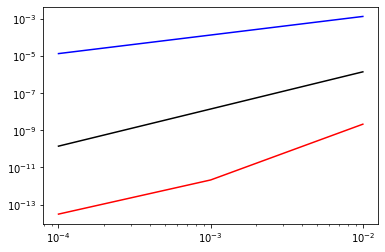

In [32]:

ax = plt.subplot(111)
ax.loglog(timesteps, er[:, 0], 'b', label = 'Classic Euler')
ax.loglog(timesteps, er[:, 1], 'k',label = '2-step 2-order')
ax.loglog(timesteps, er[:, 2], 'r',label = '3-step 3-order')